<a href="https://colab.research.google.com/github/Melanie-beautiful/hello-word/blob/master/SVD_%E5%AE%9E%E6%88%98%E4%B8%8E%E5%8F%AF%E8%A7%86%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

第一部分：手动计算 SVD (Step-by-Step)

--- 原始矩阵 A ---
[[3 1]
 [1 3]]

--- A^T * A ---
[[10  6]
 [ 6 10]]

[计算中] ATA 的特征值 (lambda): [16.  4.]

--- 奇异值矩阵 Sigma ---
[[4. 0.]
 [0. 2.]]

--- 右奇异向量矩阵 V ---
[[ 0.71 -0.71]
 [ 0.71  0.71]]

--- 左奇异向量矩阵 U ---
[[ 0.71 -0.71]
 [ 0.71  0.71]]

[验证] 让我们尝试把 U * Sigma * V.T 乘回去...

--- 重构后的 A (应与原始 A 相同) ---
[[3. 1.]
 [1. 3.]]

SUCCESS! 手动计算成功匹配。

第二部分：SVD 应用演示 - 图像压缩
正在生成示例图像并计算 SVD...
原始图像大小: (200, 200)
分解得到的奇异值数量: 200
奇异值前10个: [30444.   4090.6  2097.8  1215.6  1193.5   867.4   717.4   616.1   538.3
   492.8]


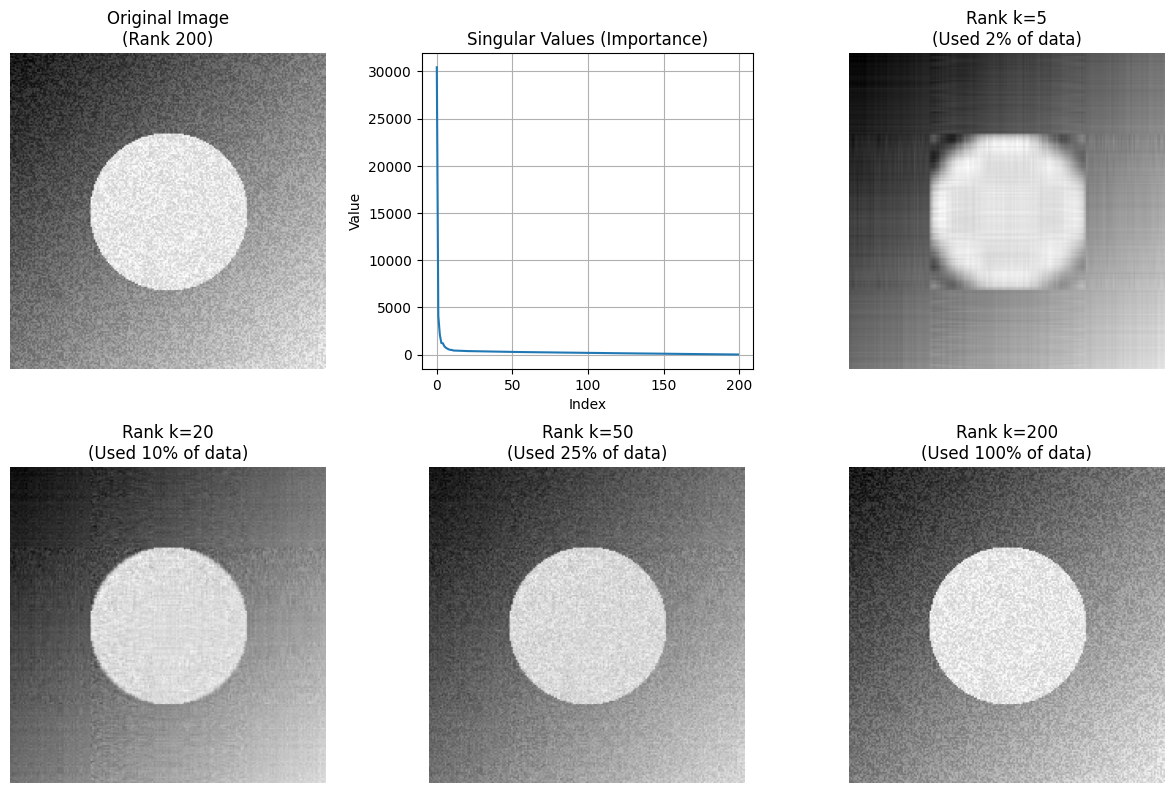

绘图完成！请查看弹出的窗口。
观察：你可以看到 k=20 (仅10%的数据) 时，已经能看清图像的主要轮廓了。
这就是 SVD 能够提取'主要特征'的直观证明。


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def print_matrix(name, matrix):
    print(f"\n--- {name} ---")
    # 为了显示美观，保留两位小数
    print(np.round(matrix, 2))

def step_by_step_svd_demo():
    print("="*60)
    print("第一部分：手动计算 SVD (Step-by-Step)")
    print("="*60)

    # 1. 定义一个简单的矩阵 A
    A = np.array([
        [3, 1],
        [1, 3]
    ])
    print_matrix("原始矩阵 A", A)

    # 2. 计算 A^T * A
    # 我们用它来找 V (右奇异向量) 和 Sigma (奇异值)
    ATA = np.dot(A.T, A)
    print_matrix("A^T * A", ATA)

    # 3. 计算 ATA 的特征值和特征向量
    eigenvalues, eigenvectors = np.linalg.eig(ATA)

    # 排序：SVD要求奇异值从大到小排列
    # argsort 返回的是从小到大的索引，所以我们需要反转
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    V = eigenvectors[:, idx]

    print("\n[计算中] ATA 的特征值 (lambda):", np.round(eigenvalues, 2))

    # 4. 计算奇异值 Sigma
    # 奇异值是特征值的平方根
    singular_values = np.sqrt(eigenvalues)
    Sigma = np.diag(singular_values)

    print_matrix("奇异值矩阵 Sigma", Sigma)
    print_matrix("右奇异向量矩阵 V", V)

    # 5. 计算 U (左奇异向量)
    # 我们可以通过公式 u_i = (1/sigma_i) * A * v_i 来计算
    # 这里直接使用 numpy 的 broadcasting 计算
    U = np.zeros_like(A, dtype=float)
    for i in range(len(singular_values)):
        U[:, i] = np.dot(A, V[:, i]) / singular_values[i]

    print_matrix("左奇异向量矩阵 U", U)

    # 6. 验证结果
    print("\n[验证] 让我们尝试把 U * Sigma * V.T 乘回去...")
    reconstructed_A = U @ Sigma @ V.T
    print_matrix("重构后的 A (应与原始 A 相同)", reconstructed_A)

    if np.allclose(A, reconstructed_A):
        print("\nSUCCESS! 手动计算成功匹配。")
    else:
        print("\nNote: 符号可能与 numpy 标准库有差异，但数学性质一致。")

def svd_image_compression_demo():
    print("\n" + "="*60)
    print("第二部分：SVD 应用演示 - 图像压缩")
    print("="*60)
    print("正在生成示例图像并计算 SVD...")

    # 1. 创建一个合成图像 (简单的梯度 + 圆形)
    # 这是一个 100x100 的矩阵
    h, w = 200, 200
    y, x = np.ogrid[:h, :w]
    # 背景是一个对角线梯度
    img = (x + y) * 0.5
    # 添加一个圆形在中间
    mask = (x - w/2)**2 + (y - h/2)**2 < (h/4)**2
    img[mask] = 200

    # 添加一些随机噪点
    noise = np.random.randint(0, 50, (h, w))
    img = img + noise

    # 2. 使用 Numpy 的标准 SVD 函数进行分解
    # full_matrices=False 表示这是经济型 SVD，只计算必要的部分
    U, S, Vt = np.linalg.svd(img, full_matrices=False)

    print(f"原始图像大小: {img.shape}")
    print(f"分解得到的奇异值数量: {len(S)}")
    print("奇异值前10个:", np.round(S[:10], 1))

    # 3. 可视化：使用不同数量的奇异值进行重构
    # k 是“秩”，即我们要保留多少个奇异值
    k_values = [5, 20, 50, 200]

    plt.figure(figsize=(12, 8))

    # 显示原图
    plt.subplot(2, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image\n(Rank 200)")
    plt.axis('off')

    # 绘制奇异值分布曲线 (Scree Plot)
    plt.subplot(2, 3, 2)
    plt.plot(S)
    plt.title("Singular Values (Importance)")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.grid(True)

    # 循环展示不同压缩率的重构结果
    for i, k in enumerate(k_values):
        # 核心逻辑：低秩近似
        # 只取前 k 列的 U，前 k 个 S，前 k 行的 Vt
        # 相当于 A_approx = U[:, :k] * Sigma[:k, :k] * Vt[:k, :]

        reconstructed_img = np.matrix(U[:, :k]) * np.diag(S[:k]) * np.matrix(Vt[:k, :])

        plt.subplot(2, 3, i + 3) # 从第3个位置开始画
        plt.imshow(reconstructed_img, cmap='gray')
        compression_ratio = 100 * k / len(S)
        plt.title(f"Rank k={k}\n(Used {compression_ratio:.0f}% of data)")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    print("绘图完成！请查看弹出的窗口。")
    print("观察：你可以看到 k=20 (仅10%的数据) 时，已经能看清图像的主要轮廓了。")
    print("这就是 SVD 能够提取'主要特征'的直观证明。")

if __name__ == "__main__":
    step_by_step_svd_demo()
    svd_image_compression_demo()